In [1]:
from prody import *

from pylab import *

ion()

@> 5191 atoms and 1 coordinate set(s) were parsed in 0.15s.


<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

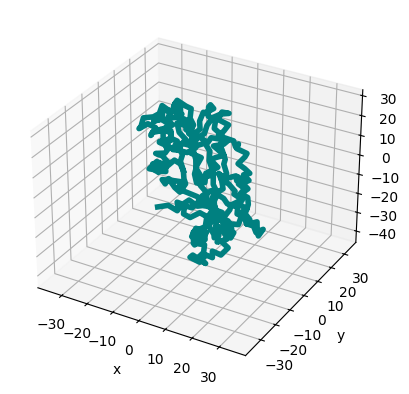

In [2]:
mono_3b3f_structure = parsePDB('3b3f_mono_IniFrame.pdb')
mono_3b3f_CA = mono_3b3f_structure.select('calpha')
showProtein(mono_3b3f_structure)

In [4]:
mono_3b3f_dcd = DCDFile('../../3b3f/monomer/analysis/aligned_3b3f_monomer_md400_ski10.dcd')

mono_3b3f_dcd.link(mono_3b3f_structure)

mono_3b3f_dcd.setAtoms(mono_3b3f_structure)

mono_3b3f_dcd.setCoords(mono_3b3f_structure)

In [5]:
mono_3b3f_dcd.setAtoms(mono_3b3f_structure.calpha)
repr(mono_3b3f_dcd)

'<DCDFile: aligned_3b3f_monomer_md400_ski10 (linked to AtomGroup 3b3f_mono_IniFrame; next 0 of 4000 frames; selected 326 of 5191 atoms)>'

In [6]:
mono_3b3f_pca = PCA('Active Monomer PCA')

mono_3b3f_pca.buildCovariance(mono_3b3f_dcd)

mono_3b3f_pca.calcModes()

repr(mono_3b3f_pca)

@> Covariance will be calculated using 4000 frames.
@> Covariance matrix calculated in 44.926606s.
@> 20 modes were calculated in 2.60s.


'<PCA: Active Monomer PCA (20 modes; 326 atoms)>'

In [7]:
writeNMD('mono_3b3f_pca10.nmd', mono_3b3f_pca[:9], mono_3b3f_CA)

'mono_3b3f_pca10.nmd'

In [8]:
for mode in mono_3b3f_pca[:9]:
    print(calcFractVariance(mode).round(3))

0.249
0.2
0.063
0.05
0.04
0.027
0.024
0.023
0.019


## ANM  calculation

In [9]:
activeMonomer = parsePDB('3b3f_A_Nter_trimmed_noSAH.pdb', compressed=False)
activeMonomer_ca = activeMonomer.select('calpha')

@> 2611 atoms and 1 coordinate set(s) were parsed in 0.13s.


In [10]:
anm_activeMonomer_ca = ANM('Active_Monomer_3b3f')
anm_activeMonomer_ca.buildHessian(activeMonomer_ca)
anm_activeMonomer_ca.calcModes()

@> Hessian was built in 0.48s.
@> 20 modes were calculated in 0.74s.


## Compare with ANM results

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


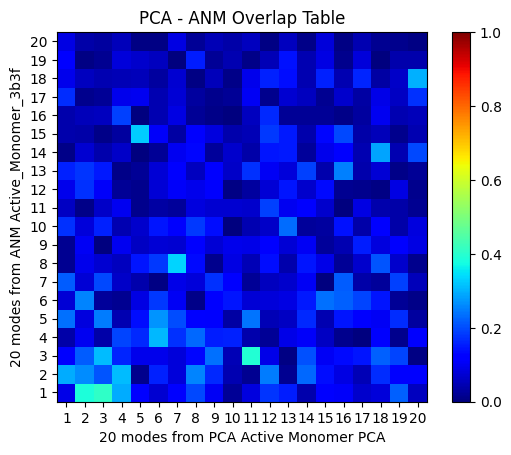

In [11]:
showOverlapTable(mono_3b3f_pca[:20], anm_activeMonomer_ca[:20])
title('PCA - ANM Overlap Table');

In [12]:
printOverlapTable(mono_3b3f_pca[:20], anm_activeMonomer_ca[:20])

Overlap Table
                                                                                     ANM Active_Monomer_3b3f
                              #1     #2     #3     #4     #5     #6     #7     #8     #9    #10    #11    #12    #13    #14    #15    #16    #17    #18    #19    #20
PCA Active Monomer PCA #1   +0.09  +0.30  +0.11  +0.04  +0.24  -0.08  +0.22  +0.02  +0.02  -0.17  +0.06  -0.09  +0.16  +0.01  +0.04  -0.04  -0.17  +0.10  -0.13  -0.09
PCA Active Monomer PCA #2   +0.39  -0.26  -0.22  -0.10  +0.08  -0.26  +0.07  +0.10  +0.10  -0.08  -0.01  -0.17  +0.18  +0.07  -0.04  -0.05  +0.01  +0.06  -0.01  +0.04
PCA Active Monomer PCA #3   +0.41  +0.21  -0.31  -0.04  +0.25  -0.03  -0.20  -0.07   0.00  -0.16  -0.07  +0.11  -0.15  -0.04  -0.01  +0.06  +0.02  -0.05  +0.02  -0.03
PCA Active Monomer PCA #4   +0.29  +0.31  -0.16  +0.19  -0.04  +0.02  +0.07  -0.06  -0.10  +0.04  +0.10  -0.02  +0.01  +0.07  -0.03  +0.19  -0.10  +0.05  +0.08  -0.05
PCA Active Monomer PCA #5   +0.13  +0.02  -

In [13]:
showOverlapTable(mono_3b3j_pca[:20], anm_inactiveMonomer_ca[:20])
title('PCA - ANM Overlap Table');

NameError: name 'mono_3b3j_pca' is not defined

In [13]:
# Renumber mono_3b3f_CA to match activeMonomer_ca
resnum_offset = 152  # Since activeMonomer_ca starts from 153, and mono_3b3f_CA starts from 1

mono_3b3f_CA_copy = mono_3b3f_CA.copy()
for atom in mono_3b3f_CA_copy:
    atom.setResnum(atom.getResnum() + resnum_offset)

# Verify the renumbering
mono_resnums = mono_3b3f_CA_copy.getResnums()
active_resnums = activeMonomer_ca.getResnums()

print(f"Renumbered mono_3b3f_CA residue numbers: {mono_resnums}")
print(f"activeMonomer_ca residue numbers: {active_resnums}")

# Check for mismatches
mismatches = set(mono_resnums) ^ set(active_resnums)
if mismatches:
    print(f"Residue number mismatches: {mismatches}")
else:
    print("Residue numbers match.")

Renumbered mono_3b3f_CA residue numbers: [153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 3